<a href="https://colab.research.google.com/github/Klaudia-777/master-thesis/blob/main/Generate_charts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [10]:
%cd /content/gdrive/MyDrive/Praca magisterska/statystyki

/content/gdrive/MyDrive/Praca magisterska/statystyki


In [11]:
%ls

2021_03_28/


In [12]:
# Choose appropriate <date>/<camera> folder
%cd 2021_03_28/rynek2/

/content/gdrive/My Drive/Praca magisterska/statystyki/2021_03_28/rynek2


In [13]:
%ls

playlist_20210328T000000+0100.csv
playlist_20210328T000000+0100_summary.txt
playlist_20210328T010001+0100.csv
playlist_20210328T010001+0100_summary.txt
playlist_20210328T030000+0200.csv
playlist_20210328T030000+0200_summary.txt
playlist_20210328T040002+0200.csv
playlist_20210328T040002+0200_summary.txt
playlist_20210328T050001+0200.csv
playlist_20210328T050001+0200_summary.txt
playlist_20210328T060000+0200.csv
playlist_20210328T060000+0200_summary.txt
playlist_20210328T070001+0200.csv
playlist_20210328T070001+0200_summary.txt
playlist_20210328T080000+0200.csv
playlist_20210328T080000+0200_summary.txt


In [6]:
import pandas as pd
import matplotlib.pyplot as plt

In [94]:
# Read example file
df = pd.read_csv (r'playlist_20210328T070001+0200.csv')
# print (df)
df["Object Max Idle"] = df["Object Max Idle"] * 5 / 25
df["Object First Frame"] = df["Object First Frame"] / 25
df["Object Last Frame"] = df["Object Last Frame"] / 25
df

,Object ID,Class,Object First Frame,Object Last Frame,Object Max Idle,Idle procent
0,8,2,91.0,101.6,7.0,66.037736
1,48,0,217.8,306.4,0.0,0.000000
2,53,2,313.6,323.2,3.8,39.583333
3,114,0,501.4,504.0,0.0,0.000000
4,309,2,103.2,1050.0,12.6,1.330798
...,...,...,...,...,...,...
92,1006,0,424.8,3607.8,0.0,0.000000
93,1007,0,2658.2,3602.0,0.0,0.000000
94,1009,0,1623.8,3607.8,0.0,0.000000
95,1010,0,3168.6,3607.8,0.0,0.000000


# Ile pieszych, rowerzystów, pojazdów wykryto w całym filmie?

In [63]:
df[["Class", "Object ID"]].groupby(["Class"]).count()

,Object ID
Class,
0,61
1,8
2,28


# Ile pieszych, rowerzystów, pojazdów wjechało (pojawiło się w obszarze) w danym interwale czasu (interwał co 5 lub 15 minut)?




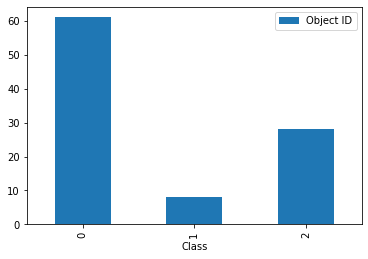

In [82]:
def filter_by_appear_time(df, start_time, end_time):
  return df.loc[(df['Object First Frame'] >= start_time * 60 ) & (df['Object First Frame'] <= end_time * 60)]
df_filtered_by_appear_time = filter_by_appear_time(df, 0, 60)
df_filtered_by_appear_time.loc[df_filtered_by_appear_time["Class"]==2]
df_filtered_by_appear_time[["Object ID", "Class"]].groupby(["Class"]).count().reset_index().plot(kind = "bar", x="Class")

# Ile znajdowało się maksymalnie jednocześnie w tej przestrzeni kamery (interwał 5 minut), przy czym podział na pojazdy jadące i nieruchome (ile stało na jakimś miejscu postojowym maksymalnie w tym okresie czasu)? 

In [84]:
def filter_by_exist_time(df, start_time, end_time):
  return df.loc[(df['Object Last Frame'] >= start_time * 60) & (df['Object First Frame'] <= end_time * 60)]
filter_by_exist_time(df, 0, 30)

,Object ID,Class,Object First Frame,Object Last Frame,Object Max Idle
0,8,2,91.0,101.6,7.0
1,48,0,217.8,306.4,0.0
2,53,2,313.6,323.2,3.8
3,114,0,501.4,504.0,0.0
4,309,2,103.2,1050.0,12.6
5,308,2,1023.2,1047.6,0.0
6,318,0,442.6,1152.8,0.0
7,339,2,833.6,1426.0,2.6
8,355,2,615.4,1165.2,0.0
9,360,2,138.4,1206.6,8.2


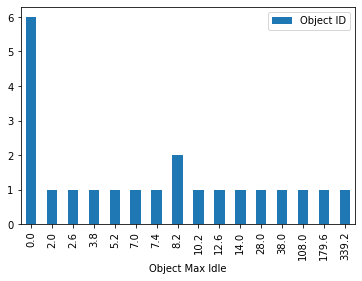

In [91]:
df_filter_by_exist_time=filter_by_exist_time(df, 0, 30)
df_filter_by_exist_time=df_filter_by_exist_time.loc[df_filter_by_exist_time["Class"]==2]
df_filter_by_exist_time[["Object ID", "Object Max Idle"]].groupby(["Object Max Idle"]).count().reset_index().plot(kind = "bar", x="Object Max Idle")

# Ile % czasu był pojazd zaparkowany podczas, kiedy był widoczny w oku kamery 

In [95]:
df["Idle procent"] = 100* df["Object Max Idle"] / (df["Object Last Frame"] - df["Object First Frame"])
df

,Object ID,Class,Object First Frame,Object Last Frame,Object Max Idle,Idle procent
0,8,2,91.0,101.6,7.0,66.037736
1,48,0,217.8,306.4,0.0,0.000000
2,53,2,313.6,323.2,3.8,39.583333
3,114,0,501.4,504.0,0.0,0.000000
4,309,2,103.2,1050.0,12.6,1.330798
...,...,...,...,...,...,...
92,1006,0,424.8,3607.8,0.0,0.000000
93,1007,0,2658.2,3602.0,0.0,0.000000
94,1009,0,1623.8,3607.8,0.0,0.000000
95,1010,0,3168.6,3607.8,0.0,0.000000
